# Decision Tree
A Decision Tree is an algorithm used for supervised learning problems such as classification or regression. A decision tree is a graphical representation of all possible solutions to a decision based on certain conditions. On each step or node of a decision tree, used for classification, we try to form a condition on the features to separate all the labels or classes contained in the dataset to the fullest purity.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
df = pd.read_csv('Company_Data (2).csv')

In [3]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [10]:
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [11]:
df.Urban.value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [13]:
df.ShelveLoc.value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [15]:
df.US.value_counts()

Yes    258
No     142
Name: US, dtype: int64

In [16]:
df.shape

(400, 11)

In [17]:
#data cleaning

df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [19]:
df1 = df.copy()
df1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [20]:
df1.mean()

Sales            7.496325
CompPrice      124.975000
Income          68.657500
Advertising      6.635000
Population     264.840000
Price          115.795000
Age             53.322500
Education       13.900000
dtype: float64

In [21]:
# making data in to categotical form 

df1.loc[df1["Sales"]>=7.49,"Income"]="Good"
df1.loc[df1["Sales"]<=7.49,"Income"]="Risky"
df1.drop('Sales',inplace = True,axis = 1)

In [23]:
def count_plot(df, columns):
    plt.figure(figsize=(10, 5))
    for i,var  in enumerate(columns):
        plt.subplot(1,2,2)
        g = sns.countplot(df[var])
    plt.tight_layout()
    
features = df1.columns.tolist()
features.remove('Income')
features

['CompPrice',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

D:\Vish\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-23-1e9ed322ea77>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,2)
D:\Vish\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipy

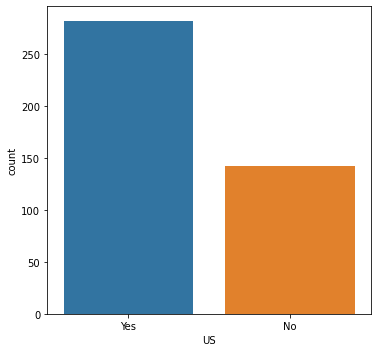

In [24]:
count_plot(df1, features)
plt.show()

In [25]:
#ordinal encoder : In ordinal encoding, each unique category value is assigned an integer value.
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder

encoder = OrdinalEncoder()
data_encoded = encoder.fit_transform(df1[features])
df1_encoded = pd.DataFrame(data_encoded,columns = features)

data_encoded

array([[ 49.,  11., 141., ...,   7.,   1.,   1.],
       [ 22.,  16., 129., ...,   0.,   1.,   1.],
       [ 24.,  10., 138., ...,   2.,   1.,   1.],
       ...,
       [ 71.,  12., 195., ...,   8.,   1.,   1.],
       [ 12.,   7., 145., ...,   2.,   1.,   1.],
       [ 45.,   0.,  12., ...,   6.,   1.,   1.]])

In [27]:
df1_encoded.head()

,CompPrice,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,49.0,11.0,141.0,54.0,0.0,17.0,7.0,1.0,1.0
1,22.0,16.0,129.0,18.0,1.0,40.0,0.0,1.0,1.0
2,24.0,10.0,138.0,15.0,2.0,34.0,2.0,1.0,1.0
3,28.0,4.0,249.0,31.0,2.0,30.0,4.0,1.0,1.0
4,52.0,3.0,178.0,62.0,0.0,13.0,3.0,1.0,0.0


In [30]:
#Label Encoder : LabelEncoder encode labels with a value between 0 and n_classes-1 where n is the number of distinct labels. If a label repeats it assigns the same value to as assigned earlier.

encoder = LabelEncoder()
target_encoded = encoder.fit_transform(df1['Income'])
target_encoded = df1_encoded['Income']
encoder.inverse_transform(target_encoded)

array(['Good', 'Good', 'Good', 'Risky', 'Risky', 'Good', 'Risky', 'Good',
       'Risky', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Risky',
       'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Risky',
       'Risky', 'Risky', 'Good', 'Good', 'Risky', 'Risky', 'Risky',
       'Good', 'Risky', 'Risky', 'Good', 'Risky', 'Risky', 'Good',
       'Risky', 'Risky', 'Risky', 'Good', 'Risky', 'Risky', 'Risky',
       'Good', 'Risky', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Risky',
       'Risky', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'R

In [31]:
df1_encoded.head()

,CompPrice,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Income
0,49.0,11.0,141.0,54.0,0.0,17.0,7.0,1.0,1.0,0
1,22.0,16.0,129.0,18.0,1.0,40.0,0.0,1.0,1.0,0
2,24.0,10.0,138.0,15.0,2.0,34.0,2.0,1.0,1.0,0
3,28.0,4.0,249.0,31.0,2.0,30.0,4.0,1.0,1.0,1
4,52.0,3.0,178.0,62.0,0.0,13.0,3.0,1.0,0.0,1


In [44]:
# converting sales float into int type
df1['Sales'] = df['Sales'].astype(int)

In [ ]:
#visualization
import matplotlib.pyplot as plt
import seaborn as sns 

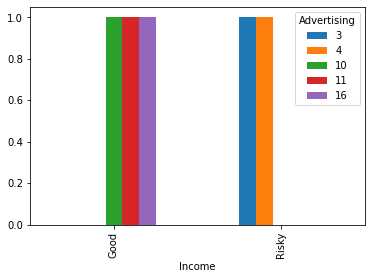

In [45]:
#Barplot betn two diff. category
pd.crosstab(df1['Income'].head(),df1['Advertising'].head()).plot(kind='bar')
plt.show()

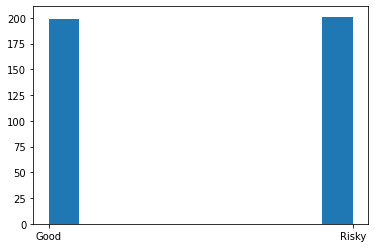

In [48]:
# histogram
plt.hist(df1.Income)
plt.show()

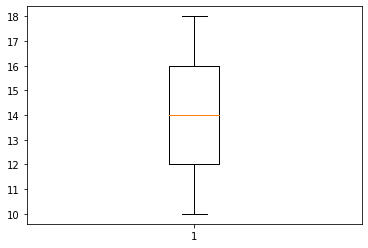

In [49]:
# boxplot
plt.boxplot(df1['Education'],vert = True)
plt.show()
#no outlier

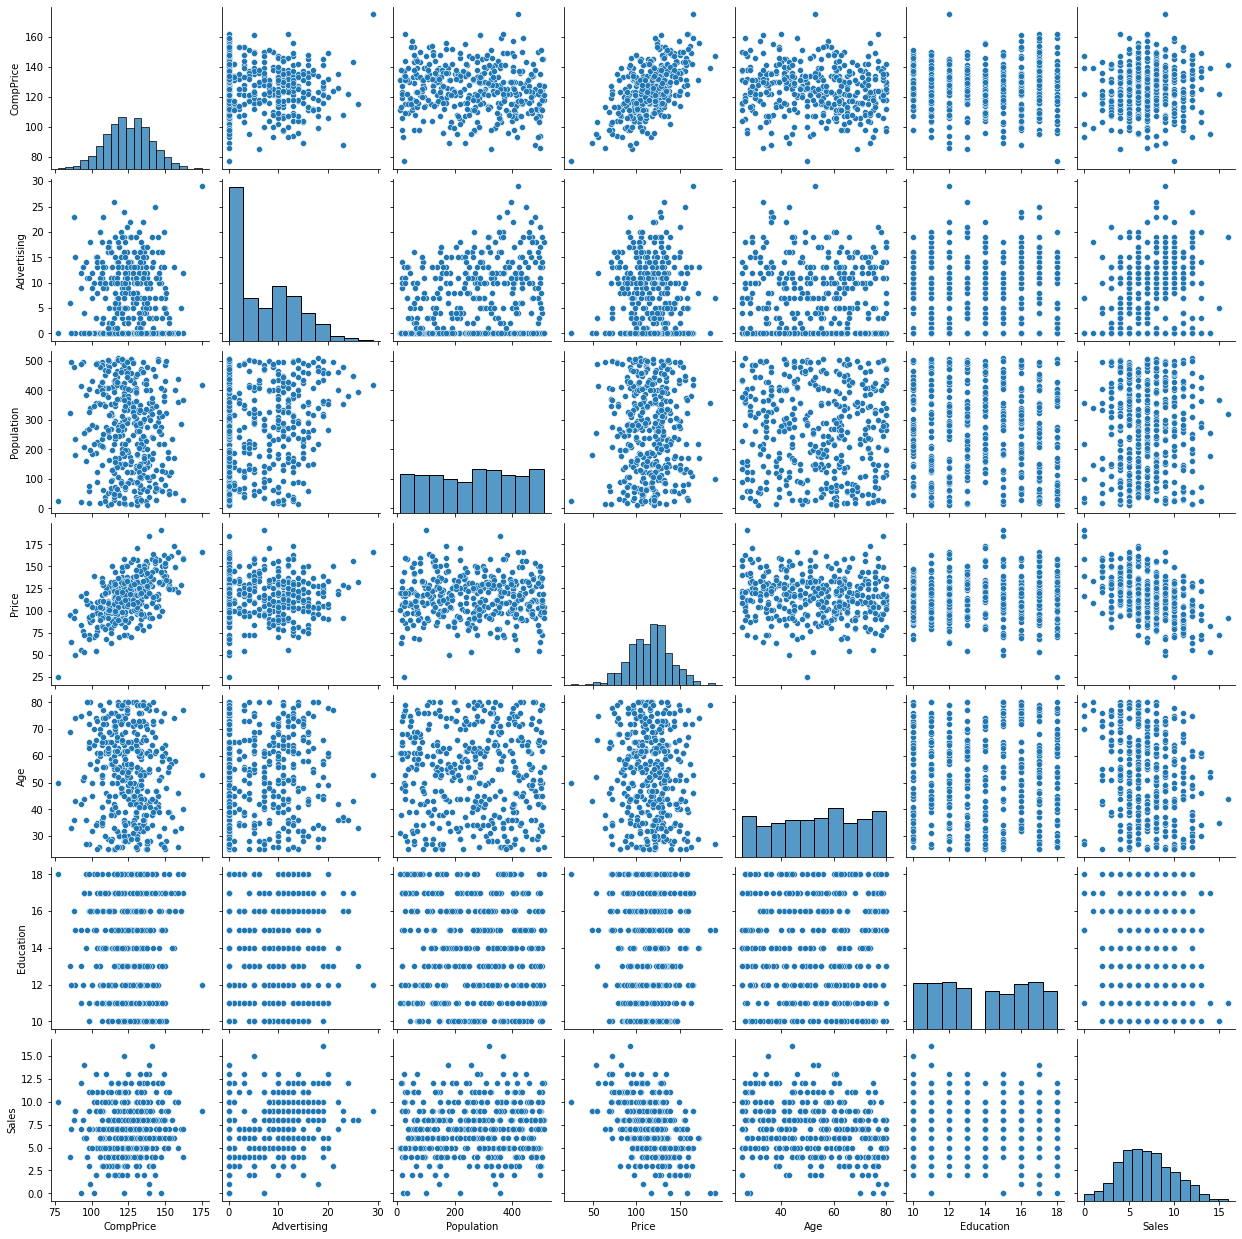

In [53]:
# pairplot
import seaborn as sns
sns.pairplot(df1)

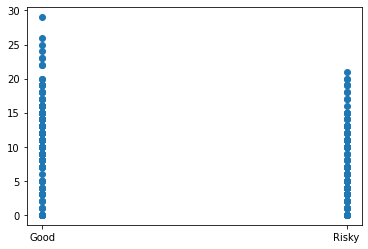

In [50]:
plt.scatter(df1.Income,df1.Advertising)
plt.show()

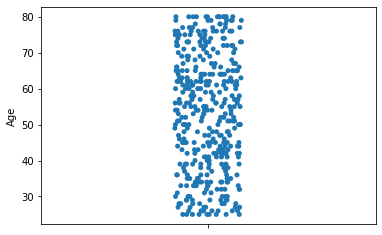

In [55]:
sns.stripplot(y='Age',data=df1,jitter=True)
plt.show()

In [ ]:
#feature selection

from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [56]:
X = df1_encoded.iloc[:,:-1]
y = df1_encoded['Income']

In [57]:
X

,CompPrice,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,49.0,11.0,141.0,54.0,0.0,17.0,7.0,1.0,1.0
1,22.0,16.0,129.0,18.0,1.0,40.0,0.0,1.0,1.0
2,24.0,10.0,138.0,15.0,2.0,34.0,2.0,1.0,1.0
3,28.0,4.0,249.0,31.0,2.0,30.0,4.0,1.0,1.0
4,52.0,3.0,178.0,62.0,0.0,13.0,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
395,49.0,17.0,104.0,62.0,1.0,8.0,4.0,1.0,1.0
396,50.0,3.0,17.0,54.0,2.0,30.0,1.0,0.0,1.0
397,71.0,12.0,195.0,91.0,2.0,15.0,8.0,1.0,1.0
398,12.0,7.0,145.0,29.0,0.0,25.0,2.0,1.0,1.0


In [58]:
y

0      0
1      0
2      0
3      1
4      1
      ..
395    0
396    1
397    1
398    1
399    0
Name: Income, Length: 400, dtype: int32

In [60]:
#Splitting dataset into train & test split

# using this train and test we prevent the over fitting part of dataseet
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=40)

print("shape of x_train",X_train.shape)
print("shape of x_test",X_test.shape)
print("shape of y_train",y_train.shape)
print("shape of y_test",y_test.shape)

shape of x_train (320, 9)
shape of x_test (80, 9)
shape of y_train (320,)
shape of y_test (80,)


In [61]:
X_train.corr()

,CompPrice,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
CompPrice,1.000000,-0.028948,-0.109772,0.574617,0.062570,-0.087104,0.067924,0.038742,0.016328
Advertising,-0.028948,1.000000,0.291403,0.033836,0.022569,0.009784,-0.055833,0.080288,0.681758
Population,-0.109772,0.291403,1.000000,-0.021804,-0.039198,-0.013783,-0.096197,-0.020283,0.090677
Price,0.574617,0.033836,-0.021804,1.000000,0.029146,-0.116226,0.115430,0.046004,0.070218
ShelveLoc,0.062570,0.022569,-0.039198,0.029146,1.000000,0.062742,0.013487,-0.049865,-0.046237
Age,-0.087104,0.009784,-0.013783,-0.116226,0.062742,1.000000,-0.003956,0.031752,0.040856
Education,0.067924,-0.055833,-0.096197,0.115430,0.013487,-0.003956,1.000000,-0.027561,-0.113411
Urban,0.038742,0.080288,-0.020283,0.046004,-0.049865,0.031752,-0.027561,1.000000,0.090387
US,0.016328,0.681758,0.090677,0.070218,-0.046237,0.040856,-0.113411,0.090387,1.000000


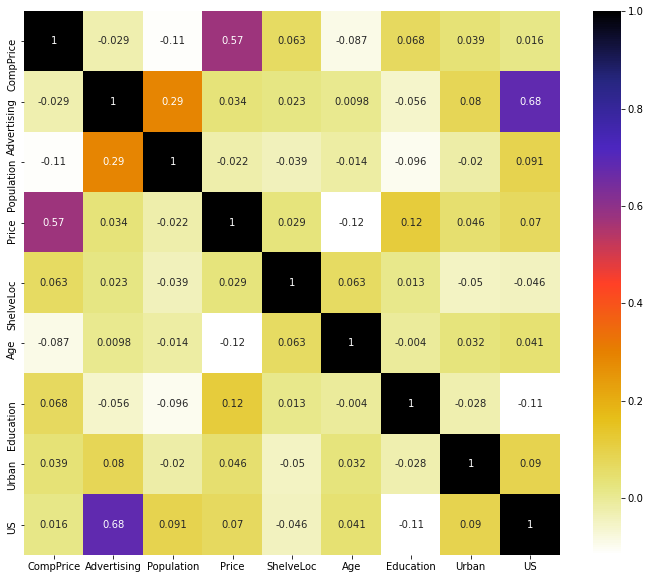

In [62]:
import seaborn as sns
# using pearson correlation,we doing correlation on training dataset only
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [63]:
def correlation(dataset,threshold):
    col_corr = set()  
    corr_metrix = dataset.corr()
    for i in range(len(corr_metrix.columns)):
        for j in range(i):
            if (corr_metrix.iloc[i,j]) > threshold: 
                colnames = corr_metrix.columns[i]  # getting the names of colimns
                col_corr.add(colnames)
    return col_corr

In [64]:
corr_features = correlation(X_train,0.7)
len(set(corr_features))

0

In [65]:
corr_features

set()

In [66]:
# training the decision tree model
from sklearn.tree import DecisionTreeClassifier     

In [67]:
#GINI method

classifier1 = DecisionTreeClassifier(criterion = 'gini',max_depth=3)
classifier1

DecisionTreeClassifier(max_depth=3)

In [68]:
classifier1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [69]:
classifier1.score(X_test,y_test)

0.7125

In [ ]:
#It gives good accuracy.

In [70]:
#ENTROPY Method
classifier = DecisionTreeClassifier(criterion = 'entropy',max_depth= 3)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

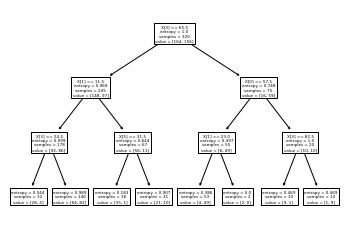

In [71]:
# Plotting Decision tree
tree.plot_tree(classifier);

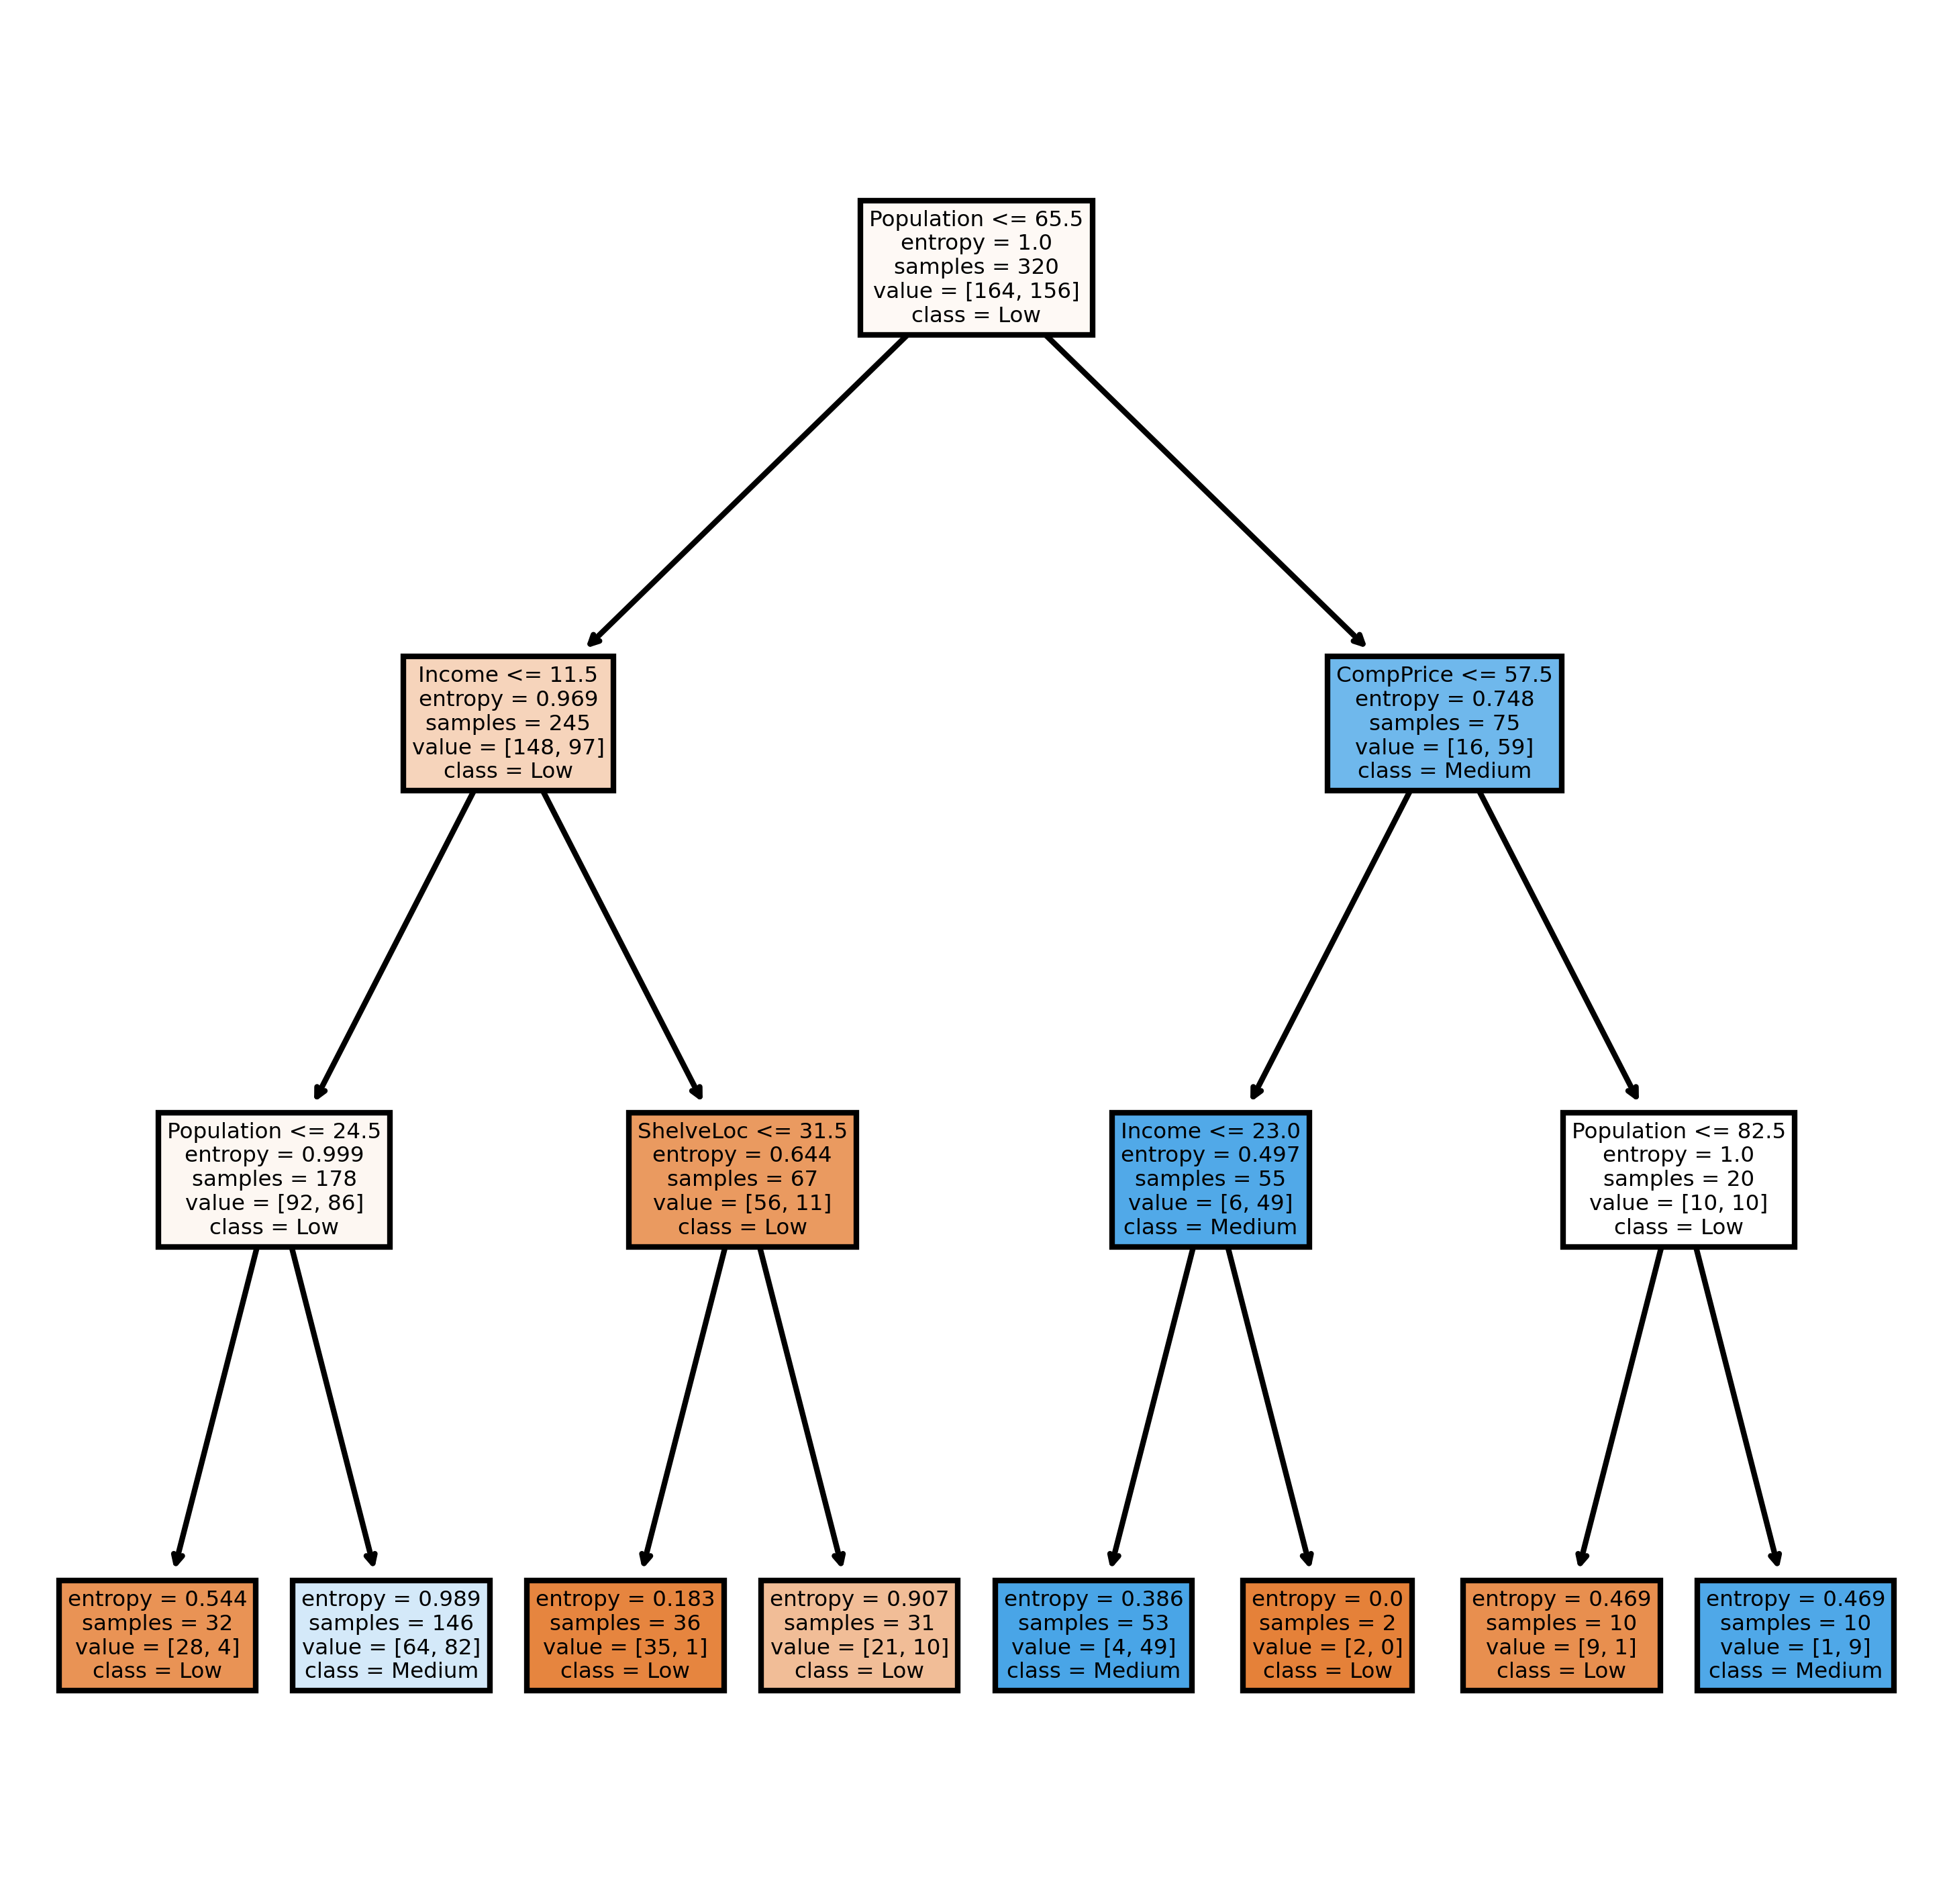

In [73]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Low', 'Medium', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)
tree.plot_tree(classifier,
               feature_names = fn, 
               class_names=cn,
               filled = True);


In [74]:
classifier.score(X_test,y_test)

0.6875

In [ ]:
#It does not give that much good accuracy.

In [75]:
#Predicting on test data
preds = classifier.predict(X_test) 

In [76]:
preds

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0])

In [79]:
# Predicting Data
preds = classifier.predict(X_test)
pd.Series(preds).value_counts()

1    56
0    24
dtype: int64

In [80]:
# Creating cross tables for checking model
pd.crosstab(y_test, preds)

col_0,0,1
Income,,
0,17,18
1,7,38


In [81]:
#feature scaling using standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [82]:
sc.fit_transform(X_train,y_train)  # fitting model on x train

array([[-0.0452962 , -1.05154434,  0.21750154, ..., -0.2903153 ,
        -1.53896753, -1.41090546],
       [ 0.09080505, -1.05154434,  0.45767759, ..., -0.67579621,
         0.64978629, -1.41090546],
       [ 0.36300756, -1.05154434, -0.93281536, ...,  0.0951656 ,
         0.64978629, -1.41090546],
       ...,
       [ 0.70326069,  1.23235287,  1.08971984, ..., -1.44675801,
         0.64978629,  0.70876471],
       [-0.65775183,  1.84139213,  0.62200858, ...,  1.2516083 ,
         0.64978629,  0.70876471],
       [ 0.49910881, -1.05154434, -0.76848437, ...,  1.2516083 ,
         0.64978629, -1.41090546]])

In [83]:
classifier_sc = DecisionTreeClassifier()  # decision tree classifier with gini method 
classifier_sc.fit(X_train,y_train)     # using decision tree classifier we fitting the model on x y train   

DecisionTreeClassifier()

In [84]:
classifier_sc.score(X_test,y_test)     # checking score using .score method on x y test

0.6875

In [ ]:
#not good accuracy comparing to gini method.